In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly as ply
import regex as re

In [2]:
df1 = pd.read_csv('movies11.csv')
# df1.drop(index=0,inplace=True)
#df1.reset_index()
df1.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
df2 = pd.read_csv('movie12.csv',header=None)
df2.columns = ['movieId','title','genres']
df2

,movieId,title,genres
0,41,Richard III (1995),Drama|War
1,42,Dead Presidents (1995),Action|Crime|Drama
2,43,Restoration (1995),Drama
3,44,Mortal Kombat (1995),Action|Adventure|Fantasy
4,45,To Die For (1995),Comedy|Drama|Thriller
5,46,How to Make an American Quilt (1995),Drama|Romance
6,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
7,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
8,49,When Night Is Falling (1995),Drama|Romance
9,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [4]:
df3 = pd.read_csv('movies13.csv',header=None)
df3.columns = ['movieId','title','genres']
df3

,movieId,title,genres
0,71,Fair Game (1995),Action
1,72,Kicking and Screaming (1995),Comedy|Drama
2,73,"Misérables, Les (1995)",Drama|War
3,74,Bed of Roses (1996),Drama|Romance
4,75,Big Bully (1996),Comedy|Drama
...,...,...,...
10599,42015,Casanova (2005),Action|Adventure|Comedy|Drama|Romance
10600,42018,Mrs. Henderson Presents (2005),Comedy|Drama
10601,42021,"White Countess, The (2005)",Drama
10602,42053,Dirty Love (2005),Comedy|Romance


In [5]:
mov = pd.concat([df1,df2,df3])
mov.describe()
mov.shape

(10674, 3)

In [6]:
rat = pd.read_csv("rating11.csv")
rat.describe()
rat.shape

(58010, 4)

In [7]:
mov = mov.set_index(['movieId'])
mov

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
...,...,...
42015,Casanova (2005),Action|Adventure|Comedy|Drama|Romance
42018,Mrs. Henderson Presents (2005),Comedy|Drama
42021,"White Countess, The (2005)",Drama


In [8]:
index = mov.index
index
masala = {}
for i in index:
    gen = mov['genres'][i]
    m = re.search('action|romance|comedy|thriller',gen,flags=re.I|re.M)
    if m != None:
        masala[i] = mov.loc[i]['title']

df = pd.DataFrame(masala,index=masala.keys())
df1 = pd.DataFrame(df.loc[1,:])
df1

,1
1,Toy Story (1995)
3,Grumpier Old Men (1995)
4,Waiting to Exhale (1995)
5,Father of the Bride Part II (1995)
6,Heat (1995)
...,...
42011,Fun with Dick and Jane (2005)
42013,"Ringer, The (2005)"
42015,Casanova (2005)
42018,Mrs. Henderson Presents (2005)


In [9]:
target_genres = ['Action', 'Romance', 'Comedy', 'Thriller']
filtered_df = mov[mov['genres'].apply(lambda x: all(genre in x for genre in target_genres))]
filtered_df

,title,genres
movieId,,
380,True Lies (1994),Action|Adventure|Comedy|Romance|Thriller
2468,Jumpin' Jack Flash (1986),Action|Comedy|Romance|Thriller
4719,Osmosis Jones (2001),Action|Animation|Comedy|Crime|Drama|Romance|Th...
4956,"Stunt Man, The (1980)",Action|Adventure|Comedy|Drama|Romance|Thriller
6564,Lara Croft Tomb Raider: The Cradle of Life (2003),Action|Adventure|Comedy|Romance|Thriller
6714,So Close (Chik Yeung Tin Sai) (2002),Action|Comedy|Romance|Thriller
31367,"Chase, The (1994)",Action|Adventure|Comedy|Crime|Romance|Thriller
34435,Sholay (1975),Action|Adventure|Comedy|Musical|Romance|Thriller


In [10]:
index = mov.index
index
masala = []
for i in index:
    gen = mov['genres'][i]
    lst = gen.split('|')
    #print(lst)
    if 'Action' in lst and 'Romance' in lst and 'Comedy' in lst and 'Thriller' in lst:
        #print(mov.loc[i]['title'])
        masala.append(mov.loc[i]['title'])

masala

['True Lies (1994)',
 "Jumpin' Jack Flash (1986)",
 'Osmosis Jones (2001)',
 'Stunt Man, The (1980)',
 'Lara Croft Tomb Raider: The Cradle of Life (2003)',
 'So Close (Chik Yeung Tin Sai) (2002)',
 'Chase, The (1994)',
 'Sholay (1975)']

In [11]:
mov['title'].nunique()

10672

In [12]:
# set.clear()
set_1 = set()
for i in index:
    gen = mov['genres'][i]
    lst = gen.split('|')
    for i in lst :
        set_1.add(i)
set_1

{'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [13]:
d = {}
for pattern in set_1:
    count = 0
    for i in index:
        gen = mov['genres'][i]
        m = re.search(pattern,gen,flags=re.I|re.M)
        if m != None:
            count = count + 1
    d[pattern] = count

d

{'Sci-Fi': 784,
 'Film-Noir': 141,
 'Fantasy': 548,
 'Comedy': 3672,
 'Western': 277,
 'Thriller': 1711,
 'War': 509,
 'Romance': 1808,
 'Adventure': 1020,
 'Crime': 1205,
 'Musical': 470,
 'Mystery': 581,
 'Horror': 1034,
 'Animation': 272,
 'Action': 1474,
 'Children': 512,
 'Documentary': 453,
 'IMAX': 36,
 'Drama': 5415}

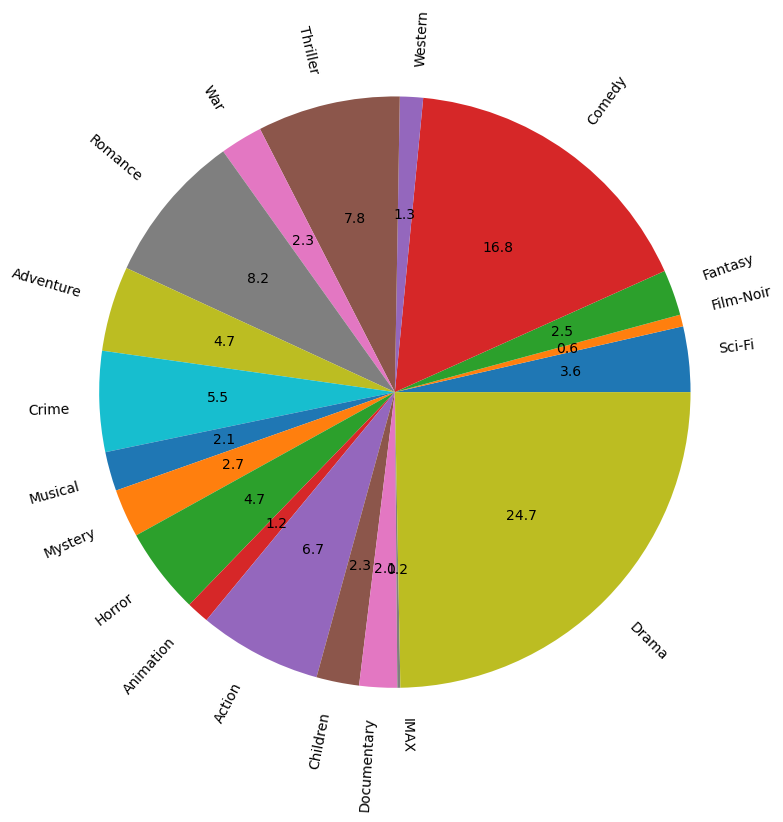

In [14]:
plt.pie(
    d.values(),                                            
    labels=d.keys(),
    radius=2,
    rotatelabels=90,
    autopct="%0.1f",                      
    # # colors=['r','g','b','c','p'],
    # # explode=(0,0,0.05,0),
    counterclock=True,
    #startangle=90
);

In [15]:
rat.nunique()

userId        6421
movieId        153
rating          10
timestamp    51407
dtype: int64

In [16]:
set_2 = set()

In [17]:
set_2 = set()
for i in rat['movieId']:
    set_2.add(i)

In [18]:
g = rat.groupby('movieId')
d1 = {}
for i in set_2:
    d1[i] =  g.get_group(i)['rating'].mean()


In [19]:
rat

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
...,...,...,...,...
58005,7120,48,4.5,1175542687
58006,7120,110,5.0,1175542038
58007,7120,141,5.0,1175542254
58008,7120,151,5.0,1175542627


In [20]:
df = pd.DataFrame(rat['movieId'])

In [21]:
# df = df.set_index('movieId')

df['avg_rating'] = rat['movieId']

In [22]:
lst4 = []
for i in rat['movieId']:
    lst4.append(i)

print(lst4)


[2, 29, 32, 47, 50, 112, 151, 3, 62, 70, 110, 1, 24, 32, 50, 6, 10, 19, 32, 2, 11, 17, 60, 62, 104, 110, 140, 141, 150, 1, 3, 7, 17, 52, 62, 135, 140, 141, 3, 7, 11, 15, 16, 17, 24, 105, 122, 151, 1, 3, 6, 10, 19, 21, 39, 47, 48, 110, 150, 153, 1, 11, 25, 1, 10, 19, 32, 39, 65, 110, 145, 150, 153, 1, 3, 5, 6, 7, 17, 32, 34, 36, 95, 104, 110, 1, 2, 10, 11, 19, 32, 34, 39, 47, 95, 110, 150, 153, 1, 7, 17, 34, 62, 150, 10, 11, 14, 17, 21, 34, 36, 39, 50, 141, 150, 153, 1, 6, 39, 122, 6, 110, 1, 3, 6, 7, 14, 17, 25, 32, 55, 61, 62, 67, 74, 76, 79, 86, 88, 92, 95, 100, 101, 112, 135, 141, 16, 19, 111, 6, 16, 32, 50, 111, 1, 6, 16, 47, 50, 69, 95, 110, 111, 1, 25, 32, 47, 50, 70, 110, 1, 5, 6, 7, 10, 16, 18, 21, 24, 25, 32, 34, 36, 39, 47, 50, 62, 69, 73, 89, 95, 104, 110, 112, 150, 151, 21, 22, 31, 32, 39, 47, 50, 104, 110, 111, 141, 10, 19, 21, 22, 39, 47, 50, 110, 150, 153, 11, 29, 47, 104, 150, 2, 9, 11, 15, 16, 19, 20, 21, 22, 23, 24, 31, 32, 34, 42, 44, 46, 47, 50, 57, 60, 70, 93, 104,

In [23]:
lst5 = []
for i in range(len(lst4)):
    lst5.append(d1[lst4[i]])

print(lst5)

[3.2683982683982684, 4.004464285714286, 3.9046280276816607, 4.078090138331103, 4.370481927710843, 3.3740031897926634, 3.514388489208633, 3.1868613138686133, 3.7620423892100194, 3.2202898550724637, 4.038227938549482, 3.959322693655119, 3.1568396226415096, 3.9046280276816607, 4.370481927710843, 3.8365079365079366, 3.4270025839793283, 2.587055606198724, 3.9046280276816607, 3.2683982683982684, 3.7121380846325165, 3.95, 3.096989966555184, 3.7620423892100194, 3.384498480243161, 4.038227938549482, 3.423954372623574, 3.499566724436742, 3.8672372611464967, 3.959322693655119, 3.1868613138686133, 3.3814285714285712, 3.95, 3.547227926078029, 3.7620423892100194, 3.046376811594203, 3.423954372623574, 3.499566724436742, 3.1868613138686133, 3.3814285714285712, 3.7121380846325165, 2.710691823899371, 3.849066390041494, 3.95, 3.1568396226415096, 3.2954545454545454, 2.8010471204188483, 3.514388489208633, 3.959322693655119, 3.1868613138686133, 3.8365079365079366, 3.4270025839793283, 2.587055606198724, 3.62

In [24]:
k = pd.DataFrame(lst5)
k.columns = ['Average Rating']
k

,Average Rating
0,3.268398
1,4.004464
2,3.904628
3,4.078090
4,4.370482
...,...
58005,2.944444
58006,4.038228
58007,3.499567
58008,3.514388


In [25]:
new_rat = pd.concat([rat,k],axis=1)
new_rat

,userId,movieId,rating,timestamp,Average Rating
0,1,2,3.5,1112486027,3.268398
1,1,29,3.5,1112484676,4.004464
2,1,32,3.5,1112484819,3.904628
3,1,47,3.5,1112484727,4.078090
4,1,50,3.5,1112484580,4.370482
...,...,...,...,...,...
58005,7120,48,4.5,1175542687,2.944444
58006,7120,110,5.0,1175542038,4.038228
58007,7120,141,5.0,1175542254,3.499567
58008,7120,151,5.0,1175542627,3.514388


In [26]:
new_mov = pd.merge(mov,new_rat,how='inner',on='movieId')
new_mov

,movieId,title,genres,userId,rating,timestamp,Average Rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,944919407,3.959323
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,858275452,3.959323
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,833981871,3.959323
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0,943497887,3.959323
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,1230858821,3.959323
...,...,...,...,...,...,...,...
52266,157,Canadian Bacon (1995),Comedy|War,6886,3.0,978133433,2.729927
52267,157,Canadian Bacon (1995),Comedy|War,6925,3.0,1034915263,2.729927
52268,157,Canadian Bacon (1995),Comedy|War,6978,3.0,977249404,2.729927
52269,157,Canadian Bacon (1995),Comedy|War,7032,3.0,1043966145,2.729927


In [27]:
new_mov.isnull().sum()

movieId           0
title             0
genres            0
userId            0
rating            0
timestamp         0
Average Rating    0
dtype: int64

In [28]:
set_1

{'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [29]:
dic = {}
index_1 = new_mov.index
for pattern in set_1:
    for i in index_1:
        gen = new_mov['genres'][i]
        if pattern in gen:
            if pattern in dic.keys():
                dic[pattern].append(new_mov.loc[i]['rating'])
            else:
                dic[pattern] = [new_mov.loc[i]['rating']]

dic

{'Sci-Fi': [3.0,
  3.0,
  4.0,
  3.0,
  4.0,
  4.0,
  3.5,
  2.0,
  1.0,
  3.0,
  3.0,
  4.0,
  3.0,
  3.0,
  4.0,
  4.0,
  2.0,
  3.0,
  3.0,
  4.0,
  4.0,
  3.0,
  2.5,
  3.5,
  3.0,
  3.0,
  4.0,
  3.5,
  3.0,
  4.0,
  1.5,
  4.0,
  3.0,
  3.0,
  4.0,
  4.0,
  3.0,
  3.0,
  2.5,
  4.0,
  3.0,
  2.0,
  5.0,
  3.5,
  4.0,
  4.0,
  4.0,
  3.0,
  3.0,
  3.0,
  5.0,
  3.5,
  2.0,
  4.0,
  2.5,
  4.0,
  3.0,
  3.0,
  4.0,
  3.0,
  3.5,
  3.0,
  4.0,
  2.0,
  3.0,
  3.0,
  3.5,
  2.5,
  3.5,
  3.0,
  3.0,
  3.0,
  2.5,
  4.0,
  3.0,
  3.0,
  3.0,
  4.0,
  4.0,
  3.5,
  4.0,
  3.0,
  4.0,
  3.0,
  3.0,
  4.0,
  3.0,
  3.0,
  3.0,
  2.0,
  4.0,
  3.0,
  1.5,
  3.5,
  3.0,
  3.5,
  5.0,
  4.0,
  3.0,
  3.0,
  4.0,
  2.0,
  2.0,
  3.5,
  4.0,
  3.0,
  3.0,
  3.0,
  3.0,
  5.0,
  3.0,
  2.5,
  2.0,
  2.0,
  3.5,
  5.0,
  3.0,
  3.0,
  4.0,
  4.0,
  3.0,
  3.0,
  3.0,
  3.0,
  3.0,
  5.0,
  3.0,
  4.0,
  3.0,
  4.0,
  3.5,
  4.0,
  2.0,
  3.5,
  3.5,
  4.0,
  1.5,
  4.0,
  3.0,
  4.0,
  3.0,
  3

In [32]:
for k in dic.keys():
    s = 0
    for i in dic[k]:
        s = s+i
    dic[k]= s/len(dic[k])
dic

{'Sci-Fi': 3.7098050296693983,
 'Fantasy': 3.6131379585326955,
 'Comedy': 3.361671397977987,
 'Thriller': 3.6951197221714494,
 'War': 3.517733230531997,
 'Romance': 3.504799497622679,
 'Adventure': 3.4798857142857145,
 'Crime': 3.6843699875245055,
 'Musical': 3.032064128256513,
 'Mystery': 4.059794706900816,
 'Horror': 3.120200826934436,
 'Animation': 3.7340138096667665,
 'Action': 3.222412232169802,
 'Children': 3.554662379421222,
 'Documentary': 3.4324324324324325,
 'IMAX': 3.864104595879556,
 'Drama': 3.6127251065389725}

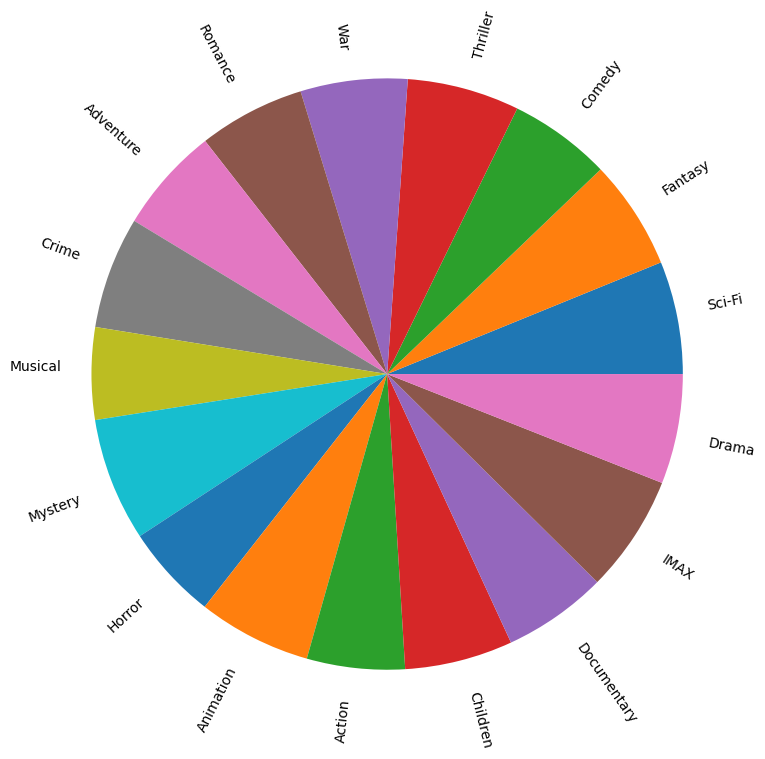

In [33]:
plt.pie(
    dic.values(),                                            
    labels=dic.keys(),
    radius=2,
    rotatelabels=90,
    #autopct="%0.1f",                      
    # # colors=['r','g','b','c','p'],
    # # explode=(0,0,0.05,0),
    counterclock=True,
    #startangle=90
);

In [34]:
def type_ch(x):
    if x<1:
        if x>=0.4:
            y = 1
        else:
            y = 0
    elif x>=1 :
        if x % int(x) >= 0.4:
            y = int(x)+1
        else:
            y = int(x)
    return y


In [35]:
rating_bar = pd.DataFrame(new_mov['rating'].apply(lambda x : type_ch(x)))

In [36]:
k = []
for i in rating_bar.value_counts():
    k.append(i)

k = pd.DataFrame(k)
k = k.transpose()

In [37]:
k.columns = ['rating1','rating2','rating3','rating4','rating5']

<Axes: >

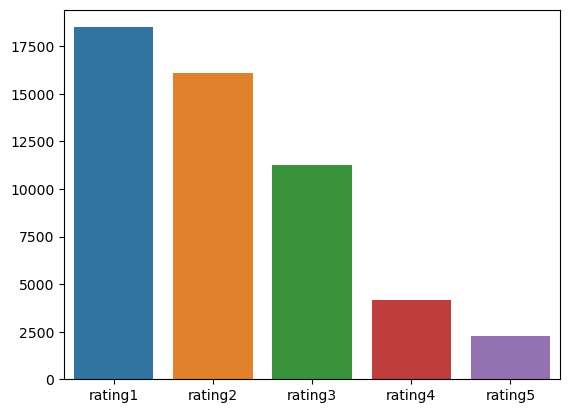

In [38]:
sns.barplot(k)